In [2]:
import os
os.environ['NUMEXPR_MAX_THREADS'] = '30'

import pandas as pd
import numpy as np
from functions import *
from plotting_beta import *
from tests import *
import matplotlib
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

In [17]:
data_stroke = np.load('stroke_landmark.pkl',allow_pickle=True)
data_healthy = np.load('healthy_landmark.pkl',allow_pickle=True)

In [18]:
gamma_t = np.linspace(0, 1, 200)

In [19]:
betas_resampled_stroke = process_kinematic(data_stroke, gamma_t)
betas_resampled_healthy = process_kinematic(data_healthy, gamma_t)
len(betas_resampled_stroke), len(betas_resampled_healthy)

(46, 84)

In [20]:
combined_demo_df = pd.read_csv('combined_demo_df.csv')
stroke_df = combined_demo_df[combined_demo_df['Cohort'] == 'Stroke']
stroke_left_demo = stroke_df[stroke_df['LesionLeft'] == 1.0]
stroke_left_demo

,Weight,Age,Male,Height,LegLength,TPS,LesionLeft,FAC,POMA,TIS,PID,Cohort
0,67.0,58,1,1710,870,114.0,1.0,3.0,23.0,16.0,3,Stroke
8,77.0,71,1,1650,880,62.0,1.0,3.0,19.0,13.0,12,Stroke
11,80.0,72,1,1700,900,18.0,1.0,5.0,26.0,16.0,15,Stroke
13,80.0,70,1,1690,900,45.0,1.0,3.0,20.0,17.0,17,Stroke
15,59.0,44,1,1720,940,91.0,1.0,5.0,28.0,15.0,20,Stroke
17,83.0,58,0,1700,910,46.0,1.0,3.0,19.0,16.0,22,Stroke
20,84.0,84,0,1580,820,31.0,1.0,4.0,24.0,9.0,25,Stroke
21,64.0,68,0,1650,880,61.0,1.0,3.0,15.0,12.0,26,Stroke
22,69.0,69,1,1700,890,39.0,1.0,3.0,21.0,14.0,27,Stroke
24,58.0,72,0,1700,820,31.0,1.0,2.0,7.0,12.0,29,Stroke


In [21]:
betas_left = [beta for beta, lesion in zip(betas_resampled_stroke, stroke_df['LesionLeft']) if lesion == 1.0]
len(betas_left), len(stroke_left_demo)

(16, 18)

In [22]:
betas_right = [beta for beta, lesion in zip(betas_resampled_stroke, stroke_df['LesionLeft']) if lesion == 0.0]
len(betas_right)

30

In [23]:
%matplotlib qt5
p = plotting_beta_landmark(betas_resampled_stroke[38])

In [10]:
p = plotting_beta_landmark(betas_right[3])

  0%|          | 0/40 [00:00<?, ?it/s]

INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend


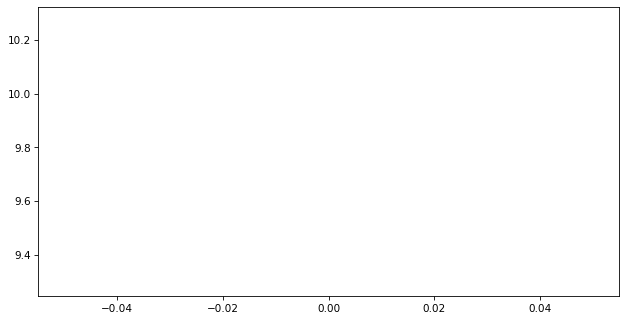

INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend


  0%|          | 0/10 [00:00<?, ?it/s]


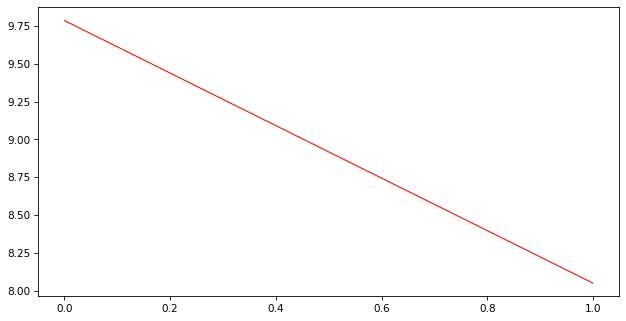

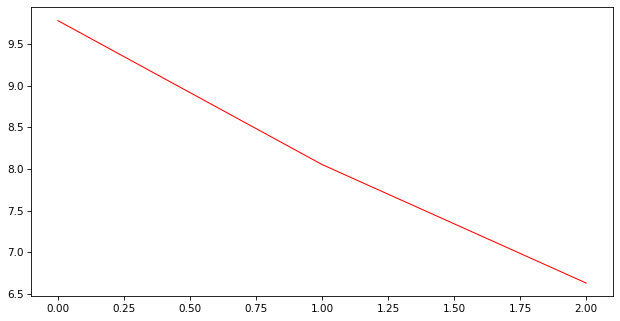

INFO: Using numpy backend


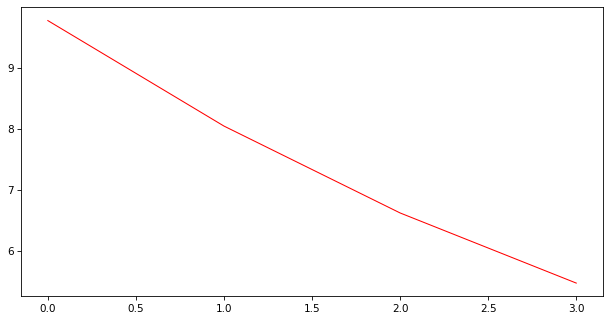

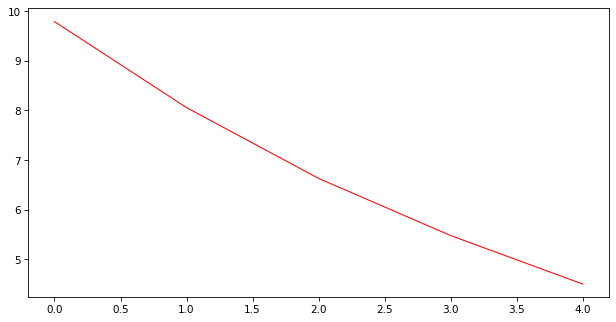

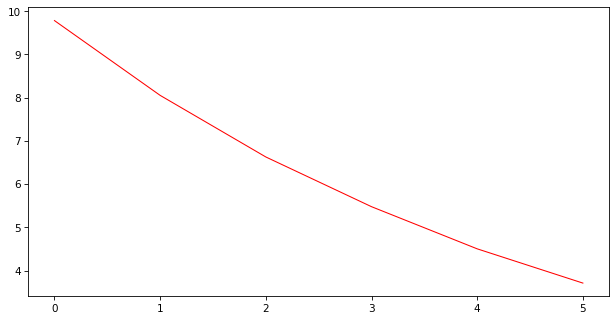

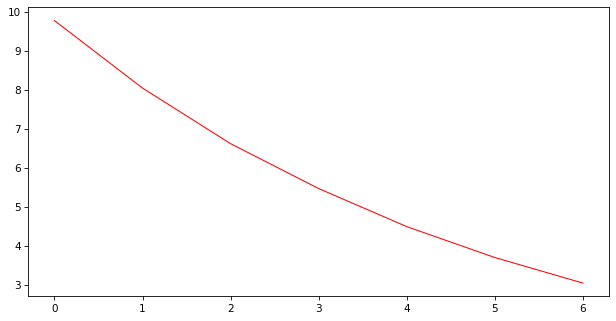

  0%|          | 0/10 [00:00<?, ?it/s]


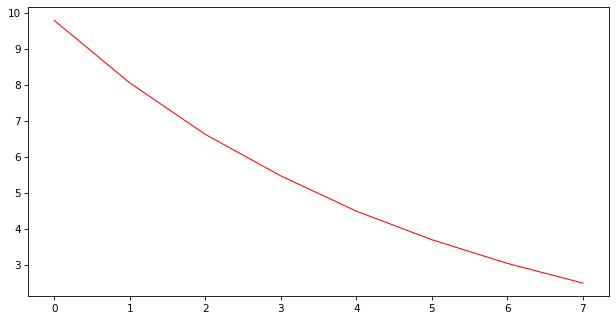

In [ ]:
%matplotlib inline
mu_left, betas_aligned_left, gammas_left, tangent_vec_left, history_left = frechet(betas_left, gamma_t, iterations=40)

In [ ]:
%matplotlib inline
mu_right, betas_aligned_right, gammas_right, tangent_vec_right, history_right = frechet(betas_right, gamma_t, iterations=40)

In [ ]:
def saving(betas_aligned, mu, gammas, tangent_vecs, filename):
    with open('{}/betas_aligned.pkl'.format(filename), 'wb') as f:
        pickle.dump(betas_aligned, f)
    with open('{}/mu.pkl'.format(filename), 'wb') as f:
        pickle.dump(mu, f)
    with open('{}/gammas.pkl'.format(filename), 'wb') as f:
        pickle.dump(gammas, f)
    with open('{}/tangent_vecs.pkl'.format(filename), 'wb') as f:
        pickle.dump(tangent_vecs, f)

In [ ]:
saving(betas_aligned_left, mu_left, gammas_left, tangent_vec_left, 'left_lesion_aligned')
saving(betas_aligned_right, mu_right, gammas_right, tangent_vec_right, 'right_lesion_aligned')

In [ ]:
# loading
def loading(filename):
    with open('{}/betas_aligned.pkl'.format(filename), 'rb') as f:
        betas_aligned = pickle.load(f)
    with open('{}/mu.pkl'.format(filename), 'rb') as f:
        mu = pickle.load(f)
    with open('{}/gammas.pkl'.format(filename), 'rb') as f:
        gammas = pickle.load(f)
    with open('{}/tangent_vecs.pkl'.format(filename), 'rb') as f:
        tangent_vec_all = pickle.load(f)
    return betas_aligned, mu, gammas, tangent_vec_all

In [ ]:
betas_aligned_left, mu_left, gammas_left, tangent_vec_left = loading('left_lesion_aligned')
betas_aligned_right, mu_right, gammas_right, tangent_vec_right = loading('right_lesion_aligned')

In [15]:
%matplotlib qt5
# mu_left_rot = mu_left.copy()
# mu_left_rot[:,0,:] = mu_left_rot[:,0,:] * -1
p_mu_left = plotting_beta_landmark(mu_left)

  0%|          | 0/10 [00:00<?, ?it/s]


In [14]:
%matplotlib qt5
p_mu_right = plotting_beta_landmark(mu_right)

In [ ]:
%matplotlib qt5
# first is black (left)
# second is red (right)

mu_left_rot = mu_left.copy()
mu_left_rot[:,0,:] = mu_left_rot[:,0,:] * -1
mu_left_rot[:,1,:] = mu_left_rot[:,1,:] + 0.25

p_mu_lr = plotting_2betas_landmark(mu_left_rot, mu_right)

In [ ]:
# fps = 10
    
# # Define the writer with the correct framerate
# writervideo = matplotlib.animation.FFMpegWriter(fps=fps)

# filename = 'pics_videos/left_right_mean.mp4'
    
# # Save the animation with the correct writer
# p_mu_lr.to_video(filename, fps=fps)

In [ ]:
%matplotlib inline
for i in range(29):
    plt.plot(mu_right[i,0,:])

In [ ]:
%matplotlib inline
for i in range(29):
    plt.plot(mu_left_rot[i,0,:])

In [ ]:
mu_aligned, _, _ = temporal_rotation_align(mu_left, mu_right, gamma_t, iterations=10)

In [ ]:
test_aligned, _, _ = temporal_rotation_align(betas_resampled_healthy[10], betas_resampled_stroke[5], gamma_t, iterations=10)

In [ ]:
# blue, black, red
shifted = betas_resampled_healthy[10].copy() + 0.25
plotting_3betas_landmark(test_aligned, betas_resampled_stroke[5], shifted)

In [ ]:
%matplotlib qt5

# mu_aligned_c = mu_aligned.copy()
# mu_aligned_c[:,1,:] = mu_aligned_c[:,1,:] + 0.25

mu_right = mu_right + 0.25

p_mu_lr = plotting_2betas_landmark(mu_aligned, mu_left)
p_mu_lr = plotting_2betas_landmark(mu_aligned, mu_right)

In [ ]:
# blue, black, red
plotting_3betas_landmark(mu_aligned, mu_left, mu_right)

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri May 24 15:37:52 2024

@author: jgh6ds
"""

import kineticstoolkit.lab as ktk
import numpy as np
import matplotlib.pyplot as plt
import random
import pickle
import os


def interconn(sub, color_tuple):
    interconnections = dict()  # Will contain all segment definitions
    interconnections["{}_LLowerLimb".format(sub)] = {
        "Color": color_tuple,  # In RGB format (here, greenish blue)
        "Links": [  # List of lines that span lists of markers
            ["{}:LTOE".format(sub), "{}:LHEE".format(sub), "{}:LANK".format(sub), "{}:LTOE".format(sub)],
            ["{}:LANK".format(sub), "{}:LKNE".format(sub), "{}:LASI".format(sub)],
            ["{}:LKNE".format(sub), "{}:LPSI".format(sub)],
        ],
    }

    interconnections["{}_RLowerLimb".format(sub)] = {
        "Color": color_tuple,
        "Links": [
            ["{}:RTOE".format(sub), "{}:RHEE".format(sub), "{}:RANK".format(sub), "{}:RTOE".format(sub)],
            ["{}:RANK".format(sub), "{}:RKNE".format(sub), "{}:RASI".format(sub)],
            ["{}:RKNE".format(sub), "{}:RPSI".format(sub)],
        ],
    }

    interconnections["{}_LUpperLimb".format(sub)] = {
        "Color": color_tuple,
        "Links": [
            ["{}:LSHO".format(sub), "{}:LELB".format(sub), "{}:LWRA".format(sub), "{}:LFIN".format(sub)],
            ["{}:LELB".format(sub), "{}:LWRB".format(sub), "{}:LFIN".format(sub)],
            ["{}:LWRA".format(sub), "{}:LWRB".format(sub)],
        ],
    }

    interconnections["{}_RUpperLimb".format(sub)] = {
        "Color": color_tuple,
        "Links": [
            ["{}:RSHO".format(sub), "{}:RELB".format(sub), "{}:RWRA".format(sub), "{}:RFIN".format(sub)],
            ["{}:RELB".format(sub), "{}:RWRB".format(sub), "{}:RFIN".format(sub)],
            ["{}:RWRA".format(sub), "{}:RWRB".format(sub)],
        ],
    }

    interconnections["{}_Head".format(sub)] = {
        "Color": color_tuple,
        "Links": [
            ["{}:C7".format(sub), "{}:LFHD".format(sub), "{}:RFHD".format(sub), "{}:C7".format(sub)],
            ["{}:C7".format(sub), "{}:LBHD".format(sub), "{}:RBHD".format(sub), "{}:C7".format(sub)],
            ["{}:LBHD".format(sub), "{}:LFHD".format(sub)],
            ["{}:RBHD".format(sub), "{}:RFHD".format(sub)],
        ],
    }

    interconnections["{}_TrunkPelvis".format(sub)] = {
        "Color": color_tuple,
        "Links": [
            ["{}:LASI".format(sub), "{}:STRN".format(sub), "{}:RASI".format(sub)],
            ["{}:STRN".format(sub), "{}:CLAV".format(sub)],
            ["{}:LPSI".format(sub), "{}:T10".format(sub), "{}:RPSI".format(sub)],
            ["{}:T10".format(sub), "{}:C7".format(sub)],
            ["{}:LASI".format(sub), "{}:LSHO".format(sub), "{}:LPSI".format(sub)],
            ["{}:RASI".format(sub), "{}:RSHO".format(sub), "{}:RPSI".format(sub)],
            ["{}:LPSI".format(sub), "{}:LASI".format(sub), "{}:RASI".format(sub), "{}:RPSI".format(sub), "{}:LPSI".format(sub)],
            ["{}:LSHO".format(sub), "{}:CLAV".format(sub), "{}:RSHO".format(sub), "{}:C7".format(sub), "{}:LSHO".format(sub)],
        ],
    }

    return interconnections


def create_marker_dict(beta, sub):
    
    marker_list = [
        "{}:LFHD".format(sub),
        "{}:RFHD".format(sub),
        "{}:LBHD".format(sub),
        "{}:RBHD".format(sub),
        "{}:C7".format(sub),
        # "{}:T10".format(sub),
        # "{}:CLAV".format(sub),
        # "{}:STRN".format(sub),
        "{}:LSHO".format(sub),
        "{}:LELB".format(sub),
        "{}:LWRA".format(sub),
        "{}:LWRB".format(sub),
        "{}:LFIN".format(sub),
        "{}:RSHO".format(sub),
        "{}:RELB".format(sub),
        "{}:RWRA".format(sub),
        "{}:RWRB".format(sub),
        "{}:RFIN".format(sub),
        "{}:LASI".format(sub),
        "{}:RASI".format(sub),
        "{}:LTHI".format(sub),
        "{}:LKNE".format(sub),
        "{}:LTIB".format(sub),
        "{}:LANK".format(sub),
        "{}:LHEE".format(sub),
        "{}:LTOE".format(sub),
        "{}:RTHI".format(sub),
        "{}:RKNE".format(sub),
        "{}:RTIB".format(sub),
        "{}:RANK".format(sub),
        "{}:RHEE".format(sub),
        "{}:RTOE".format(sub),
    ]
    
    landmark_array = beta
    confidence = np.ones((landmark_array.shape[0], 1, landmark_array.shape[2]))
    landmark_w_confidence = np.concatenate(
        (landmark_array, confidence), axis=1
    )
    timeshape = landmark_w_confidence.shape[2]

    landmark_dict = {
        marker: landmark_w_confidence[i].T
        for i, marker in enumerate(marker_list)
    }

    return landmark_dict, timeshape
    

def plotting_3betas_landmark(beta1, beta2, beta3):

    landmark_dict1, timeshape = create_marker_dict(beta1, "sub1")
    landmark_dict2, timeshape = create_marker_dict(beta2, "sub2")
    landmark_dict3, timeshape = create_marker_dict(beta3, "sub3")
    #landmark_dict4, timeshape = create_marker_dict(beta4, "sub4")

    landmark_dict = landmark_dict1.copy()
    landmark_dict.update(landmark_dict2)
    landmark_dict.update(landmark_dict3)
    #landmark_dict.update(landmark_dict4)

    interconn1 = interconn("sub1", (0, 0.5, 1)) # Blue
    interconn2 = interconn("sub2", (0, 0, 0)) # Black
    interconn3 = interconn("sub3", (1, 0, 0)) # Red
    #interconn4 = interconn("sub4", (0, 0, 1)) # Green

    interconnections = interconn1.copy()
    interconnections.update(interconn2)
    interconnections.update(interconn3)
    #interconnections.update(interconn4)

    ts = ktk.TimeSeries()  # Create an empty TimeSeries
    ts.time = np.arange(0, timeshape / 100, 0.01)
    ts.data = landmark_dict

    p = ktk.Player(
        ts,
        interconnections=interconnections,
        up="z",
        target=(0.0, 0.0, 0.0),
        grid_color=(0.95, 0.95, 0.95),
        azimuth=3.1416 / 4,
        elevation=3.1416 / 6,
        zoom=5,
        background_color="w",
        point_size=10,
        playback_speed = 0.005
    )

    markers = p.get_contents()
    
    for key in markers.data:
        if key.startswith("sub1:"):
            markers = markers.add_data_info(key, "Color", (0, 0.5, 1))
        elif key.startswith("sub2:"):
            markers = markers.add_data_info(key, "Color", (0, 0, 0))
        #elif key.startswith("sub3:"):
        else:
            markers = markers.add_data_info(key, "Color", (1, 0, 0))
        #else:
            #markers = markers.add_data_info(key, "Color", (0, 0, 1))
    
    p.set_contents(markers)

    return p
